<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Ajuste da base

Objetivo:
Prever **Perda de circulação** em função dos dados de geologia, geofísica, engenharia de reservatórios e engenharia de poços na etapa de planejamento com o intuito de alocar sonda convencional ou MPD para execução do poço.


In [51]:
%autosave 0

Autosave disabled


In [1]:
import itertools
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Autosave disabled


In [2]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [3]:
# define tamanho padrão das figuras
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10 

In [4]:
xl = pd.ExcelFile('2018-01 - Tabelao 89 poços.xlsx')
'''
print(xl.sheet_names) # Imprime as planilhas disponíveis no arquivo excel
print(type(xl)) # Imprime o tipo de arquivo
print(xl.sheet_names) # Imprime as planilhas
'''
df1 = xl.parse('Dados'); # Recebe a planilha Dados ; não mostra o resultado

In [5]:
df1

,IDENTIFICAÇÃO = ID,Unnamed: 1,Unnamed: 2,SÍSMICA = A,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,MODELO RESERVATÓRIO = B,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,PERFIS POÇO = C,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,LITOLOGIA = D,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,PERFURAÇÃO = E,Unnamed: 28,MODELO GEOLÓGICO = F,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
FASE,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A1,0.08,0.54,1000,4.41,NaN,NaN,NaN,9329,NaN,0.561,0.368,NaN,0.951888,7.33333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0,1,2,0.61,100,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A2,0.05,0.05,1000,4.41,NaN,NaN,NaN,788,NaN,0.176,0,NaN,0,0,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1,NaN,0.54,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A3,0.05,0.05,1000,4.41,NaN,NaN,NaN,3939,NaN,0.709,0.172,NaN,1.05342,2.73333,NaN,23.49,17.66,1.61,NaN,56.7,42,1.3,1,NaN,0.61,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,B1,0.13,0.92,3000,4.41,NaN,NaN,NaN,1196,NaN,0.547,0,NaN,0.78642,1.21667,NaN,4.42,5.64,0,NaN,89.3,4.8,5.9,1,NaN,0.63,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,A1,0.16,0.83,300,2.33,NaN,NaN,NaN,24027,NaN,0.67,0.325,NaN,1.35192,9.88426,NaN,62.12,17.53,7.03,NaN,0,100,0,1,15,0.42,999,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,A2,0.33,0.88,80,2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,A3,0.46,0.95,17,2.33,NaN,NaN,NaN,3186,NaN,0.841,0.1,NaN,1.19666,9.14352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,B1,0.12,0.84,127,2.33,NaN,NaN,NaN,1309,NaN,0.359,0.007,NaN,1.17186,8.00255,NaN,20.56,10.79,2.4,NaN,7.7,92.3,0,1,NaN,0.695,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P3,A1,0.05,0.05,1000,4.05,NaN,NaN,NaN,5364,NaN,0.694,0.306,NaN,NaN,NaN,NaN,40.42,28.76,2.43,NaN,2.6,82.9,14.5,0,14,0.47,120,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta


In [6]:
df1.columns = df1.iloc[0] # Receber a primeira linha e definir como índice da tabela
df1.head()

FASE,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
FASE,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A1,0.08,0.54,1000,4.41,NaN,NaN,NaN,9329,NaN,0.561,0.368,NaN,0.951888,7.33333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0,1,2,0.61,100,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A2,0.05,0.05,1000,4.41,NaN,NaN,NaN,788,NaN,0.176,0,NaN,0,0,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1,NaN,0.54,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A3,0.05,0.05,1000,4.41,NaN,NaN,NaN,3939,NaN,0.709,0.172,NaN,1.05342,2.73333,NaN,23.49,17.66,1.61,NaN,56.7,42,1.3,1,NaN,0.61,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,B1,0.13,0.92,3000,4.41,NaN,NaN,NaN,1196,NaN,0.547,0,NaN,0.78642,1.21667,NaN,4.42,5.64,0,NaN,89.3,4.8,5.9,1,NaN,0.63,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.index
df1[df1.iloc[0]]

FASE,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
FASE,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A1,0.08,0.54,1000,4.41,NaN,NaN,NaN,9329,NaN,0.561,0.368,NaN,0.951888,7.33333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0,1,2,0.61,100,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A2,0.05,0.05,1000,4.41,NaN,NaN,NaN,788,NaN,0.176,0,NaN,0,0,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1,NaN,0.54,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,A3,0.05,0.05,1000,4.41,NaN,NaN,NaN,3939,NaN,0.709,0.172,NaN,1.05342,2.73333,NaN,23.49,17.66,1.61,NaN,56.7,42,1.3,1,NaN,0.61,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P1,B1,0.13,0.92,3000,4.41,NaN,NaN,NaN,1196,NaN,0.547,0,NaN,0.78642,1.21667,NaN,4.42,5.64,0,NaN,89.3,4.8,5.9,1,NaN,0.63,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,A1,0.16,0.83,300,2.33,NaN,NaN,NaN,24027,NaN,0.67,0.325,NaN,1.35192,9.88426,NaN,62.12,17.53,7.03,NaN,0,100,0,1,15,0.42,999,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,A2,0.33,0.88,80,2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,A3,0.46,0.95,17,2.33,NaN,NaN,NaN,3186,NaN,0.841,0.1,NaN,1.19666,9.14352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P2,B1,0.12,0.84,127,2.33,NaN,NaN,NaN,1309,NaN,0.359,0.007,NaN,1.17186,8.00255,NaN,20.56,10.79,2.4,NaN,7.7,92.3,0,1,NaN,0.695,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FASE 1 (38 POÇOS BASE INICIAL),C1,C1P3,A1,0.05,0.05,1000,4.05,NaN,NaN,NaN,5364,NaN,0.694,0.306,NaN,NaN,NaN,NaN,40.42,28.76,2.43,NaN,2.6,82.9,14.5,0,14,0.47,120,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta


In [8]:
dftabela=df1.reset_index(drop=True) # Remover os itens da coluna "Fase", pois não representam informação
dftabela=dftabela.drop(0) # Remover primeira linha que foi definida como índice (colunas)
print(dftabela.index) # Verificar os índices
dftabela.columns.name='Amostra' # Modificar o nome da coluna 1 (índice)
print(dftabela.columns) # Verificar colunas
dftabela.head(5) 

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            294, 295, 296, 297, 298, 299, 300, 301, 302, 303],
           dtype='int64', length=303)
Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'ATRIB_CONF', 'ATRIB_MED2', 'ATRIB_MAX2', 'ATRIB_DIST2',
       'B1', 'B1CONF', 'B2', 'B3', 'B2B3CONF', 'C1_MED', 'C1_MAX', 'C1CONF',
       'C2 (GLOBAL)', 'C3 (FRACO)', 'C4 (FORTE)', 'C2C3C4CONF', 'FACI0',
       'FACI1', 'FACI2 (DIAG)', 'FACICONF', 'FACI3', 'DIFP', 'PERDA_MAX',
       'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9',
       'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14', 'MGPCONF1', 'MGPCONF2',
       'MGPCONF3', 'MGPCONF4', 'MGPCONF5', 'MGPCONF6', 'MGPCONF7', 'MGPCONF8',
       'MGPCONF9', 'MGPCONF10', 'MGPCONF11', 'MGPCONF12', 'MGPCONF13',
       'MGPCONF14'],
      dtype='object', name='Amostra')


Amostra,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
1,C1,C1P1,A1,0.08,0.54,1000,4.41,NaN,NaN,NaN,9329,NaN,0.561,0.368,NaN,0.951888,7.33333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0,1,2,0.61,100,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
2,C1,C1P1,A2,0.05,0.05,1000,4.41,NaN,NaN,NaN,788,NaN,0.176,0,NaN,0,0,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1,NaN,0.54,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C1,C1P1,A3,0.05,0.05,1000,4.41,NaN,NaN,NaN,3939,NaN,0.709,0.172,NaN,1.05342,2.73333,NaN,23.49,17.66,1.61,NaN,56.7,42,1.3,1,NaN,0.61,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1,C1P1,B1,0.13,0.92,3000,4.41,NaN,NaN,NaN,1196,NaN,0.547,0,NaN,0.78642,1.21667,NaN,4.42,5.64,0,NaN,89.3,4.8,5.9,1,NaN,0.63,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C1,C1P2,A1,0.16,0.83,300,2.33,NaN,NaN,NaN,24027,NaN,0.67,0.325,NaN,1.35192,9.88426,NaN,62.12,17.53,7.03,NaN,0,100,0,1,15,0.42,999,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta


In [9]:
dftabela.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 57 columns):
AREA            303 non-null object
POÇO            303 non-null object
ID_INTERVALO    303 non-null object
ATRIB_MED1      298 non-null object
ATRIB_MAX1      298 non-null object
ATRIB_DIST1     298 non-null object
ATRIB_CONF      298 non-null object
ATRIB_MED2      113 non-null object
ATRIB_MAX2      113 non-null object
ATRIB_DIST2     113 non-null object
B1              117 non-null object
B1CONF          0 non-null object
B2              116 non-null object
B3              116 non-null object
B2B3CONF        0 non-null object
C1_MED          117 non-null object
C1_MAX          230 non-null object
C1CONF          0 non-null object
C2 (GLOBAL)     205 non-null object
C3 (FRACO)      105 non-null object
C4 (FORTE)      205 non-null object
C2C3C4CONF      0 non-null object
FACI0           104 non-null object
FACI1           104 non-null object
FACI2 (DIAG)    207 non-null object
FAC

Necessário ajustar os dados, muitos objetos (farei mais a frente)

In [10]:
dftabela[['AREA','POÇO']]=dftabela[['AREA','POÇO']].fillna(method='ffill')
#Preencher células vazias com pseudonome do campo e poço, se for necessário, copiando o valor da célula anterior.
dftabela
#df1.columns

Amostra,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
1,C1,C1P1,A1,0.08,0.54,1000,4.41,NaN,NaN,NaN,9329,NaN,0.561,0.368,NaN,0.951888,7.33333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0,1,2,0.61,100,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
2,C1,C1P1,A2,0.05,0.05,1000,4.41,NaN,NaN,NaN,788,NaN,0.176,0,NaN,0,0,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1,NaN,0.54,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C1,C1P1,A3,0.05,0.05,1000,4.41,NaN,NaN,NaN,3939,NaN,0.709,0.172,NaN,1.05342,2.73333,NaN,23.49,17.66,1.61,NaN,56.7,42,1.3,1,NaN,0.61,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1,C1P1,B1,0.13,0.92,3000,4.41,NaN,NaN,NaN,1196,NaN,0.547,0,NaN,0.78642,1.21667,NaN,4.42,5.64,0,NaN,89.3,4.8,5.9,1,NaN,0.63,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C1,C1P2,A1,0.16,0.83,300,2.33,NaN,NaN,NaN,24027,NaN,0.67,0.325,NaN,1.35192,9.88426,NaN,62.12,17.53,7.03,NaN,0,100,0,1,15,0.42,999,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
6,C1,C1P2,A2,0.33,0.88,80,2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C1,C1P2,A3,0.46,0.95,17,2.33,NaN,NaN,NaN,3186,NaN,0.841,0.1,NaN,1.19666,9.14352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C1,C1P2,B1,0.12,0.84,127,2.33,NaN,NaN,NaN,1309,NaN,0.359,0.007,NaN,1.17186,8.00255,NaN,20.56,10.79,2.4,NaN,7.7,92.3,0,1,NaN,0.695,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C1,C1P3,A1,0.05,0.05,1000,4.05,NaN,NaN,NaN,5364,NaN,0.694,0.306,NaN,NaN,NaN,NaN,40.42,28.76,2.43,NaN,2.6,82.9,14.5,0,14,0.47,120,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
10,C1,C1P3,A2,0.05,0.05,240,4.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.notnull(dftabela['DIFP']);

In [12]:
dftabela= dftabela.replace('-',0) # Substituir 0 por -. Poços onde a perfuração foi nearbalance (DIFP=0) foi cadastrado 0 como -
dftabela = dftabela[pd.notnull(dftabela['DIFP'])] # Remover colunas amostras onde não #foi cadastrado do DIFP (zona não atravessada no respectivo poço)
dftabela.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 303
Data columns (total 57 columns):
AREA            298 non-null object
POÇO            298 non-null object
ID_INTERVALO    298 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
ATRIB_CONF      293 non-null float64
ATRIB_MED2      113 non-null float64
ATRIB_MAX2      113 non-null float64
ATRIB_DIST2     113 non-null float64
B1              117 non-null float64
B1CONF          0 non-null float64
B2              116 non-null float64
B3              116 non-null float64
B2B3CONF        0 non-null float64
C1_MED          117 non-null float64
C1_MAX          230 non-null float64
C1CONF          0 non-null float64
C2 (GLOBAL)     205 non-null float64
C3 (FRACO)      105 non-null float64
C4 (FORTE)      205 non-null float64
C2C3C4CONF      0 non-null float64
FACI0           104 non-null float64
FACI1           104 non-null float64
FACI2 (DIAG)    20

In [13]:
dftabela.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'ATRIB_CONF', 'ATRIB_MED2', 'ATRIB_MAX2', 'ATRIB_DIST2',
       'B1', 'B1CONF', 'B2', 'B3', 'B2B3CONF', 'C1_MED', 'C1_MAX', 'C1CONF',
       'C2 (GLOBAL)', 'C3 (FRACO)', 'C4 (FORTE)', 'C2C3C4CONF', 'FACI0',
       'FACI1', 'FACI2 (DIAG)', 'FACICONF', 'FACI3', 'DIFP', 'PERDA_MAX',
       'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9',
       'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14', 'MGPCONF1', 'MGPCONF2',
       'MGPCONF3', 'MGPCONF4', 'MGPCONF5', 'MGPCONF6', 'MGPCONF7', 'MGPCONF8',
       'MGPCONF9', 'MGPCONF10', 'MGPCONF11', 'MGPCONF12', 'MGPCONF13',
       'MGPCONF14'],
      dtype='object', name='Amostra')

Completar os dados de geologia que são preenchidos por poço e não por zona. Um poço atravessa mais de uma zona. Foi informado pelo geólogo que as propriedades definidas no grupo "geo", listadas abaixo são comuns para zonas de reservatório de um mesmo poço.

In [14]:
geo=['MGP1', 'MGP2', 'MGP3','MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11',
       'MGP12', 'MGP13', 'MGP14', 'MGPCONF1', 'MGPCONF2', 'MGPCONF3','MGPCONF4', 'MGPCONF5', 'MGPCONF6', 'MGPCONF7', 'MGPCONF8', 'MGPCONF9',
       'MGPCONF10', 'MGPCONF11', 'MGPCONF12', 'MGPCONF13', 'MGPCONF14']

In [15]:
dftabela[geo]=dftabela[geo].fillna(method='ffill')
dftabela.head()

Amostra,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
1,C1,C1P1,A1,0.08,0.54,1000.0,4.41,NaN,NaN,NaN,9329.0,NaN,0.561,0.368,NaN,0.951888,7.333333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0.0,1.0,2.0,0.61,100.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
2,C1,C1P1,A2,0.05,0.05,1000.0,4.41,NaN,NaN,NaN,788.0,NaN,0.176,0.000,NaN,0.000000,0.000000,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1.0,NaN,0.54,12.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
3,C1,C1P1,A3,0.05,0.05,1000.0,4.41,NaN,NaN,NaN,3939.0,NaN,0.709,0.172,NaN,1.053419,2.733334,NaN,23.49,17.66,1.61,NaN,56.7,42.0,1.3,1.0,NaN,0.61,10.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
4,C1,C1P1,B1,0.13,0.92,3000.0,4.41,NaN,NaN,NaN,1196.0,NaN,0.547,0.000,NaN,0.786420,1.216667,NaN,4.42,5.64,0.00,NaN,89.3,4.8,5.9,1.0,NaN,0.63,0.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
5,C1,C1P2,A1,0.16,0.83,300.0,2.33,NaN,NaN,NaN,24027.0,NaN,0.670,0.325,NaN,1.351920,9.884260,NaN,62.12,17.53,7.03,NaN,0.0,100.0,0.0,1.0,15.0,0.42,999.0,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta


In [16]:
#dfbase=dftabela.dropna(axis=1)
dfbase_projeto=dftabela # Definir nova variável
dfbase_projeto.head()

Amostra,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
1,C1,C1P1,A1,0.08,0.54,1000.0,4.41,NaN,NaN,NaN,9329.0,NaN,0.561,0.368,NaN,0.951888,7.333333,NaN,136.29,48.04,17.29,NaN,31.3,68.7,0.0,1.0,2.0,0.61,100.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
2,C1,C1P1,A2,0.05,0.05,1000.0,4.41,NaN,NaN,NaN,788.0,NaN,0.176,0.000,NaN,0.000000,0.000000,NaN,29.18,23.57,2.05,NaN,94.5,4.7,0.8,1.0,NaN,0.54,12.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
3,C1,C1P1,A3,0.05,0.05,1000.0,4.41,NaN,NaN,NaN,3939.0,NaN,0.709,0.172,NaN,1.053419,2.733334,NaN,23.49,17.66,1.61,NaN,56.7,42.0,1.3,1.0,NaN,0.61,10.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
4,C1,C1P1,B1,0.13,0.92,3000.0,4.41,NaN,NaN,NaN,1196.0,NaN,0.547,0.000,NaN,0.786420,1.216667,NaN,4.42,5.64,0.00,NaN,89.3,4.8,5.9,1.0,NaN,0.63,0.0,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
5,C1,C1P2,A1,0.16,0.83,300.0,2.33,NaN,NaN,NaN,24027.0,NaN,0.670,0.325,NaN,1.351920,9.884260,NaN,62.12,17.53,7.03,NaN,0.0,100.0,0.0,1.0,15.0,0.42,999.0,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta


Salvar progresso em um arquivo CSV

In [17]:
dfbase_projeto.to_csv('base_projeto.csv', encoding='utf-8')

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Preparo dos dados

In [18]:
dfbase=pd.read_csv('base_projeto.csv', index_col=0)

In [19]:
dfbase

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,ATRIB_CONF,ATRIB_MED2,ATRIB_MAX2,ATRIB_DIST2,B1,B1CONF,B2,B3,B2B3CONF,C1_MED,C1_MAX,C1CONF,C2 (GLOBAL),C3 (FRACO),C4 (FORTE),C2C3C4CONF,FACI0,FACI1,FACI2 (DIAG),FACICONF,FACI3,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,MGPCONF1,MGPCONF2,MGPCONF3,MGPCONF4,MGPCONF5,MGPCONF6,MGPCONF7,MGPCONF8,MGPCONF9,MGPCONF10,MGPCONF11,MGPCONF12,MGPCONF13,MGPCONF14
1,C1,C1P1,A1,0.08,0.54,1000.00,4.41,NaN,NaN,NaN,9329.0,NaN,0.561,0.368,NaN,0.951888,7.333333,NaN,136.290000,48.04,17.29,NaN,31.3,68.7,0.000000,1.0,2.0,0.6100,100.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
2,C1,C1P1,A2,0.05,0.05,1000.00,4.41,NaN,NaN,NaN,788.0,NaN,0.176,0.000,NaN,0.000000,0.000000,NaN,29.180000,23.57,2.05,NaN,94.5,4.7,0.800000,1.0,NaN,0.5400,12.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
3,C1,C1P1,A3,0.05,0.05,1000.00,4.41,NaN,NaN,NaN,3939.0,NaN,0.709,0.172,NaN,1.053419,2.733334,NaN,23.490000,17.66,1.61,NaN,56.7,42.0,1.300000,1.0,NaN,0.6100,10.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
4,C1,C1P1,B1,0.13,0.92,3000.00,4.41,NaN,NaN,NaN,1196.0,NaN,0.547,0.000,NaN,0.786420,1.216667,NaN,4.420000,5.64,0.00,NaN,89.3,4.8,5.900000,1.0,NaN,0.6300,0.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
5,C1,C1P2,A1,0.16,0.83,300.00,2.33,NaN,NaN,NaN,24027.0,NaN,0.670,0.325,NaN,1.351920,9.884260,NaN,62.120000,17.53,7.03,NaN,0.0,100.0,0.000000,1.0,15.0,0.4200,999.00,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
7,C1,C1P2,A3,0.46,0.95,17.00,2.33,NaN,NaN,NaN,3186.0,NaN,0.841,0.100,NaN,1.196660,9.143518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6040,500.00,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
8,C1,C1P2,B1,0.12,0.84,127.00,2.33,NaN,NaN,NaN,1309.0,NaN,0.359,0.007,NaN,1.171856,8.002550,NaN,20.560000,10.79,2.40,NaN,7.7,92.3,0.000000,1.0,NaN,0.6950,450.00,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
9,C1,C1P3,A1,0.05,0.05,1000.00,4.05,NaN,NaN,NaN,5364.0,NaN,0.694,0.306,NaN,NaN,NaN,NaN,40.420000,28.76,2.43,NaN,2.6,82.9,14.500000,0.0,14.0,0.4700,120.00,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
11,C1,C1P3,A3,0.26,0.95,120.00,4.05,NaN,NaN,NaN,224.0,NaN,0.792,0.208,NaN,NaN,NaN,NaN,26.630000,20.91,1.70,NaN,19.0,69.6,11.400000,0.0,NaN,0.3630,60.00,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta
12,C1,C1P3,B1,0.05,0.05,1000.00,4.05,NaN,NaN,NaN,12.0,NaN,0.527,0.244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.8,44.5,15.800000,0.0,NaN,0.3500,300.00,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta


In [20]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 303
Data columns (total 57 columns):
AREA            298 non-null object
POÇO            298 non-null object
ID_INTERVALO    298 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
ATRIB_CONF      293 non-null float64
ATRIB_MED2      113 non-null float64
ATRIB_MAX2      113 non-null float64
ATRIB_DIST2     113 non-null float64
B1              117 non-null float64
B1CONF          0 non-null float64
B2              116 non-null float64
B3              116 non-null float64
B2B3CONF        0 non-null float64
C1_MED          117 non-null float64
C1_MAX          230 non-null float64
C1CONF          0 non-null float64
C2 (GLOBAL)     205 non-null float64
C3 (FRACO)      105 non-null float64
C4 (FORTE)      205 non-null float64
C2C3C4CONF      0 non-null float64
FACI0           104 non-null float64
FACI1           104 non-null float64
FACI2 (DIAG)    20

Retirando as colunas de dados ***pós-drill***, pois na prática as mesmas não são completamentes conhecidas antes da perfuração dos poços

In [21]:
dfbase.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'ATRIB_CONF', 'ATRIB_MED2', 'ATRIB_MAX2', 'ATRIB_DIST2',
       'B1', 'B1CONF', 'B2', 'B3', 'B2B3CONF', 'C1_MED', 'C1_MAX', 'C1CONF',
       'C2 (GLOBAL)', 'C3 (FRACO)', 'C4 (FORTE)', 'C2C3C4CONF', 'FACI0',
       'FACI1', 'FACI2 (DIAG)', 'FACICONF', 'FACI3', 'DIFP', 'PERDA_MAX',
       'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9',
       'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14', 'MGPCONF1', 'MGPCONF2',
       'MGPCONF3', 'MGPCONF4', 'MGPCONF5', 'MGPCONF6', 'MGPCONF7', 'MGPCONF8',
       'MGPCONF9', 'MGPCONF10', 'MGPCONF11', 'MGPCONF12', 'MGPCONF13',
       'MGPCONF14'],
      dtype='object')

In [22]:
reservatorio = ['B1', 'B1CONF', 'B2', 'B3', 'B2B3CONF']
perfil = ['C1_MED', 'C1_MAX', 'C1_MED','C1_MAX', 'C1CONF', 'C2 (GLOBAL)', 'C3 (FRACO)', 
        'C4 (FORTE)','C2C3C4CONF']
litologia = ['FACI0', 'FACI1', 'FACI2 (DIAG)', 'FACICONF', 'FACI3']
pos = reservatorio + perfil + litologia

In [23]:
print(pos)

['B1', 'B1CONF', 'B2', 'B3', 'B2B3CONF', 'C1_MED', 'C1_MAX', 'C1_MED', 'C1_MAX', 'C1CONF', 'C2 (GLOBAL)', 'C3 (FRACO)', 'C4 (FORTE)', 'C2C3C4CONF', 'FACI0', 'FACI1', 'FACI2 (DIAG)', 'FACICONF', 'FACI3']


In [24]:
dfbase=dfbase.drop(pos, axis=1) # Remover colunas com informações obtidas após a perfuração do poço.

In [25]:
print(dfbase.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 303
Data columns (total 40 columns):
AREA            298 non-null object
POÇO            298 non-null object
ID_INTERVALO    298 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
ATRIB_CONF      293 non-null float64
ATRIB_MED2      113 non-null float64
ATRIB_MAX2      113 non-null float64
ATRIB_DIST2     113 non-null float64
DIFP            298 non-null float64
PERDA_MAX       298 non-null float64
MGP1            298 non-null object
MGP2            298 non-null object
MGP3            298 non-null object
MGP4            298 non-null object
MGP5            298 non-null object
MGP6            298 non-null object
MGP7            298 non-null object
MGP8            298 non-null object
MGP9            298 non-null object
MGP10           298 non-null object
MGP11           298 non-null object
MGP12           298 non-null object
MGP13           298 no

Retirar as colunas de atributos sísmicos #2 (ATRIB_MED2, ATRIB_MAX2, ATRIB_DIST2), pois há diversos dados faltantes

In [26]:
geof2=['ATRIB_MED2','ATRIB_MAX2','ATRIB_DIST2']

In [27]:
dfbase=dfbase.drop(geof2, axis=1)

In [28]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 303
Data columns (total 37 columns):
AREA            298 non-null object
POÇO            298 non-null object
ID_INTERVALO    298 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
ATRIB_CONF      293 non-null float64
DIFP            298 non-null float64
PERDA_MAX       298 non-null float64
MGP1            298 non-null object
MGP2            298 non-null object
MGP3            298 non-null object
MGP4            298 non-null object
MGP5            298 non-null object
MGP6            298 non-null object
MGP7            298 non-null object
MGP8            298 non-null object
MGP9            298 non-null object
MGP10           298 non-null object
MGP11           298 non-null object
MGP12           298 non-null object
MGP13           298 non-null object
MGP14           298 non-null object
MGPCONF1        298 non-null object
MGPCONF2        298 non-n

Retirar colunas de confiabilidade atribuídos aos features

In [29]:
conf=['ATRIB_CONF', 'MGPCONF1', 'MGPCONF2','MGPCONF3', 'MGPCONF4', 'MGPCONF5', 'MGPCONF6', 'MGPCONF7', 'MGPCONF8',
       'MGPCONF9', 'MGPCONF10', 'MGPCONF11', 'MGPCONF12', 'MGPCONF13',
       'MGPCONF14']

In [30]:
dfbase=dfbase.drop(conf, axis=1)

Conveter os valores numéricos em floats

In [31]:
numericas=['ATRIB_MED1','ATRIB_MAX1','ATRIB_DIST1','DIFP', 'PERDA_MAX']
dfbase[numericas] = dfbase[numericas].apply(pd.to_numeric, errors='ignore')

In [32]:
#dfbase['DIFP']

In [33]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 303
Data columns (total 22 columns):
AREA            298 non-null object
POÇO            298 non-null object
ID_INTERVALO    298 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
DIFP            298 non-null float64
PERDA_MAX       298 non-null float64
MGP1            298 non-null object
MGP2            298 non-null object
MGP3            298 non-null object
MGP4            298 non-null object
MGP5            298 non-null object
MGP6            298 non-null object
MGP7            298 non-null object
MGP8            298 non-null object
MGP9            298 non-null object
MGP10           298 non-null object
MGP11           298 non-null object
MGP12           298 non-null object
MGP13           298 non-null object
MGP14           298 non-null object
dtypes: float64(5), object(17)
memory usage: 53.5+ KB


In [34]:
dfbase=dfbase.dropna(subset=['ATRIB_MED1','ATRIB_MAX1','ATRIB_DIST1'])
# Remover as amostras que não possuem os dados de geofísica#1

In [35]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 22 columns):
AREA            293 non-null object
POÇO            293 non-null object
ID_INTERVALO    293 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
DIFP            293 non-null float64
PERDA_MAX       293 non-null float64
MGP1            293 non-null object
MGP2            293 non-null object
MGP3            293 non-null object
MGP4            293 non-null object
MGP5            293 non-null object
MGP6            293 non-null object
MGP7            293 non-null object
MGP8            293 non-null object
MGP9            293 non-null object
MGP10           293 non-null object
MGP11           293 non-null object
MGP12           293 non-null object
MGP13           293 non-null object
MGP14           293 non-null object
dtypes: float64(5), object(17)
memory usage: 52.6+ KB


<p style="font-family: Arial; font-size:1.50em;color:purple; font-style:bold">
Binarizando a perda para 0 ou 1.<br></p>

In [36]:
valor_perda30 = 29.99
valor_perdaAPI= 49.99
valor_perdaPS= 149.99

Referências: 
API - 50 bbl/h / Pré-sal: 150 bbl/h / GT: 30 bbl/h

In [37]:
dfbase = dfbase.copy()
dfbase['Perda30'] = (dfbase['PERDA_MAX'] > valor_perda30)*1
dfbase['PerdaAPI'] = (dfbase['PERDA_MAX'] > valor_perdaAPI)*1
dfbase['PerdaPS'] = (dfbase['PERDA_MAX'] > valor_perdaPS)*1

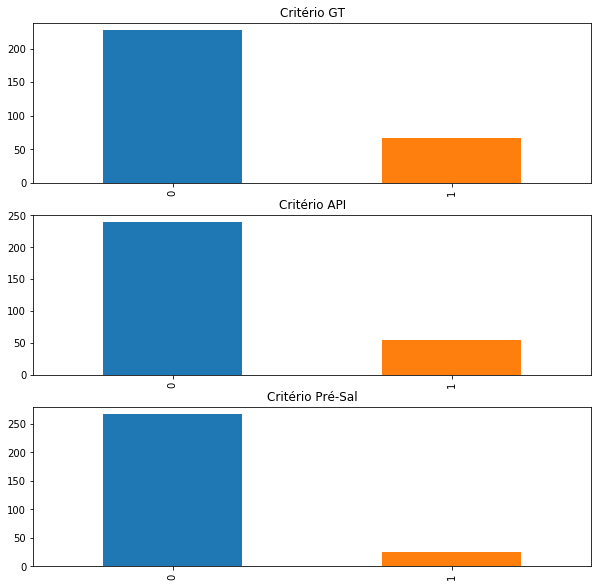

In [38]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Perda com 30 bbl/h
plt.subplot2grid(fig_dims, (0, 0))
dfbase['Perda30'].value_counts().plot(kind='bar', title='Critério GT')

# Perda com 50 bbl/h
plt.subplot2grid(fig_dims, (1, 0))
dfbase['PerdaAPI'].value_counts().plot(kind='bar', title='Critério API')

# Perda com 150 bbl/h
plt.subplot2grid(fig_dims, (2, 0))
dfbase['PerdaPS'].value_counts().plot(kind='bar', title='Critério Pré-Sal')

In [39]:
dfbase.to_csv('baseProjeto_pre_binarizada.csv', encoding='utf-8')

<br>
<p style="font-family: Arial; font-size:1.50em;color:purple; font-style:bold">
Apply get_dummies to geology questions:<br></p>

In [40]:
dfbase_dummies = dfbase.copy()
dfbase_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 25 columns):
AREA            293 non-null object
POÇO            293 non-null object
ID_INTERVALO    293 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
DIFP            293 non-null float64
PERDA_MAX       293 non-null float64
MGP1            293 non-null object
MGP2            293 non-null object
MGP3            293 non-null object
MGP4            293 non-null object
MGP5            293 non-null object
MGP6            293 non-null object
MGP7            293 non-null object
MGP8            293 non-null object
MGP9            293 non-null object
MGP10           293 non-null object
MGP11           293 non-null object
MGP12           293 non-null object
MGP13           293 non-null object
MGP14           293 non-null object
Perda30         293 non-null int32
PerdaAPI        293 non-null int32
PerdaPS         293 non-null

In [41]:
#for i in range (1,15): # Pois são 14 "Respostas da geologia"
#    x = "MGP" + str(i)
#    z = pd.get_dummies(dfbase_dummies[x])
#    z.columns = ["MGP" + str(i) + "_não","MGP" + str(i) + "_sim"]
#    dftransf = dfbase_dummies[x] # Artifício para armazernar provisoriamente a coluna X
#    dfbase_dummies.drop([x], axis=1, inplace=True) # Remove a variável que estava na coluna original
#    dfbase_dummies = pd.concat([dfbase_dummies,z], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
#dfbase_fe=dfbase_dummies
questions = [ 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9',
       'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']
dfbase_fe=dfbase_dummies
dfbase_fe[questions]=pd.get_dummies(dfbase_dummies[questions], drop_first=True, prefix_sep='_')


This method generates redundant data

In [42]:
dfbase_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 25 columns):
AREA            293 non-null object
POÇO            293 non-null object
ID_INTERVALO    293 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
DIFP            293 non-null float64
PERDA_MAX       293 non-null float64
MGP1            293 non-null uint8
MGP2            293 non-null uint8
MGP3            293 non-null uint8
MGP4            293 non-null uint8
MGP5            293 non-null uint8
MGP6            293 non-null uint8
MGP7            293 non-null uint8
MGP8            293 non-null uint8
MGP9            293 non-null uint8
MGP10           293 non-null uint8
MGP11           293 non-null uint8
MGP12           293 non-null uint8
MGP13           293 non-null uint8
MGP14           293 non-null uint8
Perda30         293 non-null int32
PerdaAPI        293 non-null int32
PerdaPS         293 non-null int32
dtypes:

In [43]:
dfbase_fe.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'PERDA_MAX', 'MGP1', 'MGP2', 'MGP3', 'MGP4',
       'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12',
       'MGP13', 'MGP14', 'Perda30', 'PerdaAPI', 'PerdaPS'],
      dtype='object')

In [44]:
dfbase_fe.to_csv('baseProjeto_to_EDA.csv', encoding='utf-8')

<br>
<p style="font-family: Arial; font-size:1.50em;color:purple; font-style:bold">
Convert geology questions from object to category:<br></p>
<br>
The category type will be read as object from csv

In [45]:
dfbase_toCategory = dfbase.copy()

In [46]:
categorize_questions = lambda x: x.astype('category')
questions = [ 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9',
       'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']

In [47]:
dfbase_toCategory[questions] = dfbase_toCategory[questions].apply(categorize_questions,axis=0)

In [48]:
#dfbase_toCategory.drop([questions], axis=1, inplace=True) # Remove a variável que estava na coluna original
#dfbase_toCategory = pd.concat([dfbase_dummies,z], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
#dfbase_fe_Category=dfbase_toCategory
dfbase_toCategory

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,PERDA_MAX,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS
1,C1,C1P1,A1,0.08,0.54,1000.00,0.6100,100.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,1,1,0
2,C1,C1P1,A2,0.05,0.05,1000.00,0.5400,12.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,0,0,0
3,C1,C1P1,A3,0.05,0.05,1000.00,0.6100,10.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,0,0,0
4,C1,C1P1,B1,0.13,0.92,3000.00,0.6300,0.00,Sim,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,0,0,0
5,C1,C1P2,A1,0.16,0.83,300.00,0.4200,999.00,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,1,1,1
7,C1,C1P2,A3,0.46,0.95,17.00,0.6040,500.00,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,1,1,1
8,C1,C1P2,B1,0.12,0.84,127.00,0.6950,450.00,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,1,1,1
9,C1,C1P3,A1,0.05,0.05,1000.00,0.4700,120.00,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,1,1,0
11,C1,C1P3,A3,0.26,0.95,120.00,0.3630,60.00,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,1,1,0
12,C1,C1P3,B1,0.05,0.05,1000.00,0.3500,300.00,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,1,1,1


In [49]:
dfbase_toCategory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 25 columns):
AREA            293 non-null object
POÇO            293 non-null object
ID_INTERVALO    293 non-null object
ATRIB_MED1      293 non-null float64
ATRIB_MAX1      293 non-null float64
ATRIB_DIST1     293 non-null float64
DIFP            293 non-null float64
PERDA_MAX       293 non-null float64
MGP1            293 non-null category
MGP2            293 non-null category
MGP3            293 non-null category
MGP4            293 non-null category
MGP5            293 non-null category
MGP6            293 non-null category
MGP7            293 non-null category
MGP8            293 non-null category
MGP9            293 non-null category
MGP10           293 non-null category
MGP11           293 non-null category
MGP12           293 non-null category
MGP13           293 non-null category
MGP14           293 non-null category
Perda30         293 non-null int32
PerdaAPI        293 non-null int32


In [50]:
dfbase_toCategory.to_csv('baseProjetoCategory_to_EDA.csv', encoding='utf-8')